# Travaux Pratiques TP 2
-------------

# Version WITHOUT need of the CHIPWHISPERER board

# AES Power Traces Re-Alignment

# ONE SOLUTION
------------
We have been collecting traces of our usual implementation of AES in this lab, with one small modification. If we use the EXTRA_OPTS=ADD_JITTER, a for loop that runs between 0 and 15 times through will be inserted:

```C
  #ifdef ADD_JITTER
  for (volatile uint8_t k = 0; k < (*pt & 0x0F); k++);
  #endif
```

As you can see, this jitter is actually based on the first byte of our plaintext. This in itself is a vulnerability. We won't use this fact, but as an exercise, try hypothocizing some ways to use this to overcome the jitter.

------------

In [1]:
import numpy as np
import time

### Load AES traces collected on the board for use

In [2]:
import estraces

In [3]:
ths = estraces.read_ths_from_ets_file('../SideSCA-Traces-Public/TP_2_CWLite_AES_traces_set_misaligned.ets')

In [4]:
print(ths)

Trace Header Set:
Name.............: ETS Format THS
Reader...........: ETS format reader of file ../SideSCA-Traces-Public/TP_2_CWLite_AES_traces_set_misaligned.ets with 100 traces.
ciphertext.......: uint8
key..............: uint8
plaintext........: uint8



In [5]:
# collect traces, plaintext, key and ciphertext

In [6]:
plaintext_np_array = ths.plaintext
print(type(plaintext_np_array))
print(plaintext_np_array)
plaintext_np_array.shape

<class 'numpy.ndarray'>
[[187 115 104 ...  59 124 108]
 [ 22 179 219 ... 131  75  30]
 [185 212  89 ... 123  97 211]
 ...
 [ 54  55  98 ... 189 108 242]
 [172  46 215 ...  80  87   0]
 [222 236  31 ... 198 107   2]]


(100, 16)

In [7]:
# collect traces, plaintext, key and ciphertext
plaintext_np_array

array([[187, 115, 104, ...,  59, 124, 108],
       [ 22, 179, 219, ..., 131,  75,  30],
       [185, 212,  89, ..., 123,  97, 211],
       ...,
       [ 54,  55,  98, ..., 189, 108, 242],
       [172,  46, 215, ...,  80,  87,   0],
       [222, 236,  31, ..., 198, 107,   2]], dtype=uint8)

In [8]:
plaintext_np_array = ths.plaintext
print(type(plaintext_np_array))
print(plaintext_np_array)
plaintext_np_array.shape

<class 'numpy.ndarray'>
[[187 115 104 ...  59 124 108]
 [ 22 179 219 ... 131  75  30]
 [185 212  89 ... 123  97 211]
 ...
 [ 54  55  98 ... 189 108 242]
 [172  46 215 ...  80  87   0]
 [222 236  31 ... 198 107   2]]


(100, 16)

In [9]:
ciphertext_np_array = ths.ciphertext
print(type(ciphertext_np_array))
print(ciphertext_np_array)
ciphertext_np_array.shape

<class 'numpy.ndarray'>
[[209  84  23 ...  93 165 236]
 [172  29  57 ... 130 219 207]
 [189  32 252 ... 115  26 207]
 ...
 [135  19  64 ... 186 203  76]
 [238  17 232 ... 176 223 220]
 [217  88 178 ... 140 159  77]]


(100, 16)

In [10]:
key_np_array = ths.key
print(type(key_np_array))
print(key_np_array)
key_np_array.shape

<class 'numpy.ndarray'>
[[ 43 126  21 ... 207  79  60]
 [ 43 126  21 ... 207  79  60]
 [ 43 126  21 ... 207  79  60]
 ...
 [ 43 126  21 ... 207  79  60]
 [ 43 126  21 ... 207  79  60]
 [ 43 126  21 ... 207  79  60]]


(100, 16)

In [11]:
traces_np_array = ths.samples
print(type(traces_np_array))
print(traces_np_array)
traces_np_array.shape

<class 'estraces.traces.samples.Samples'>
array([[ 0.09570312, -0.07519531, -0.04394531, ..., -0.16308594,
        -0.04785156, -0.00683594],
       [ 0.09375   , -0.078125  , -0.04785156, ..., -0.01855469,
        -0.00976562, -0.00683594],
       [ 0.09472656, -0.07421875, -0.046875  , ...,  0.01074219,
         0.06933594,  0.0703125 ],
       ...,
       [ 0.09765625, -0.07128906, -0.04199219, ..., -0.01757812,
        -0.00585938, -0.00390625],
       [ 0.09277344, -0.07519531, -0.04589844, ..., -0.1640625 ,
        -0.10253906, -0.06542969],
       [ 0.09667969, -0.07421875, -0.04394531, ...,  0.01953125,
         0.07617188,  0.08007812]])


(100, 8000)

#### Print the first plaintext used

In [12]:
plaintext = plaintext_np_array[0]
print(plaintext)

[187 115 104  13 228  50  43  62  27 146  14 230 252  59 124 108]


#### Print the first ciphertext that corresponds to the first plaintext

In [13]:
ciphertext = ciphertext_np_array[0]
print(ciphertext)

[209  84  23 235 125 174 116 194  20 116 211   9  51  93 165 236]


In [14]:
import matplotlib.pylab as plt

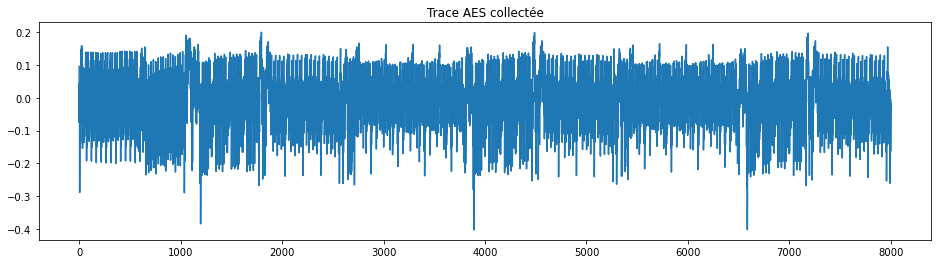

In [15]:
#%matplotlib
plt.rcParams['figure.figsize']=(16,4)
plt.title('Trace AES collectée')
plt.plot(traces_np_array[0])
plt.show()

<img src='images/DoIt.png' style='width: 100px'>


### Plot 10 traces and their first 1000 points

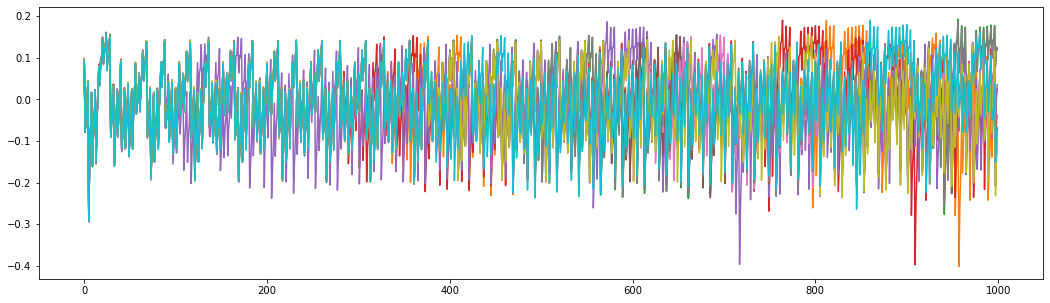

In [16]:
plt.rcParams['figure.figsize']=(18,5)
for i in range(10):
    plt.plot(traces_np_array[i][0:1000])
plt.show()

### Compute the mean and the standard deviation on the set of collected traces

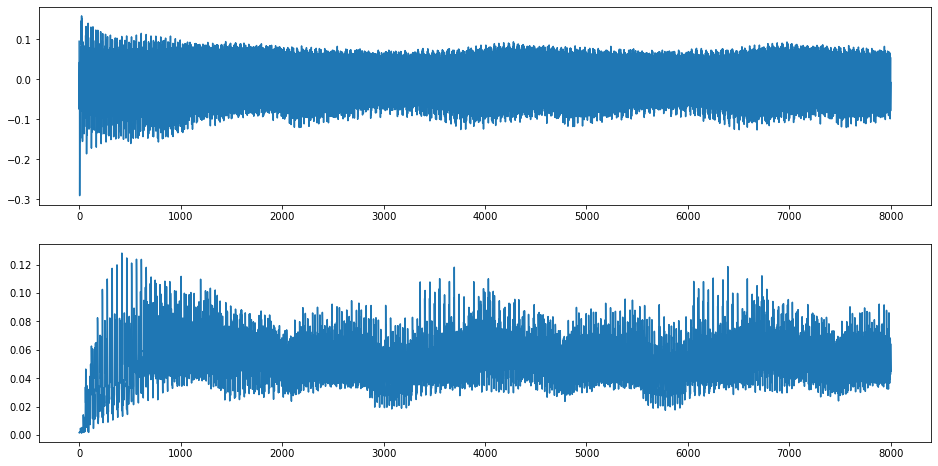

In [17]:
plt.rcParams['figure.figsize']=(16,8)
trace_mean = np.mean(traces_np_array[0:100], axis = 0)
trace_std = np.std(traces_np_array[0:100], axis = 0)
plt.subplot(2,1,1) 
plt.plot(trace_mean)
plt.subplot(2,1,2) 
plt.plot(trace_std)
plt.show()

## WHAT DO YOU OBSERVE HERE ?

<img src='images/DoIt.png' style='width: 100px'>

-----------


----
<img src='images/DoIt.png' style='width: 100px'>

## Reverse on intermediate values - First round

In [18]:
import scared

In [19]:
def aes_function_firstRde_SBout(plaintext, key):
    return scared.aes.encrypt(plaintext = plaintext, key = key, at_round=1, after_step=scared.aes.base.Steps.SUB_BYTES)

In [20]:
container = scared.Container(ths)

In [21]:
Selection_function = scared.reverse_selection_function(aes_function_firstRde_SBout)

In [22]:
Reverse_SB = scared.CPAReverse(selection_function = Selection_function, model = scared.HammingWeight())
Reverse_SB.run(container)

In [23]:
Reverse_SB.results.shape

(16, 8000)

### Plot results

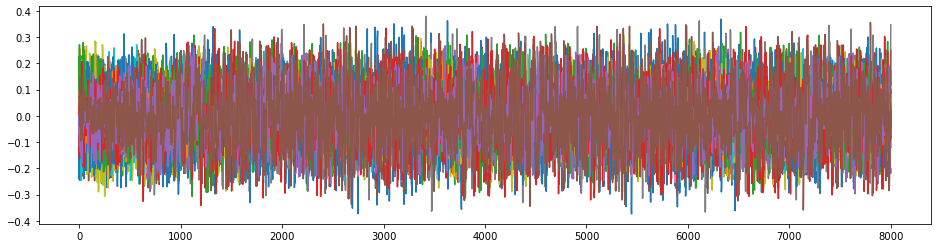

In [24]:
plt.rcParams['figure.figsize']=(16,4)
plt.plot(Reverse_SB.results.T)
plt.show()

<img src='images/DoIt.png' style='width: 100px'>

## What is the issue here? 


Based on the results and the previous plot of traces, mean and variance we understand the traces are misaligned.

We have to resynchronize the traces.

<img src='images/DoIt.png' style='width: 100px'>

------------
## Traces Resynchronization

We observe the traces are only shifted, so a first basic resynchronisation by shifting the trace should be enough

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html#scipy.signal.find_peaks


In [25]:
from scipy.signal import find_peaks

In [26]:
trace = traces_np_array[0]

In [27]:
trace_abs = np.abs(trace)

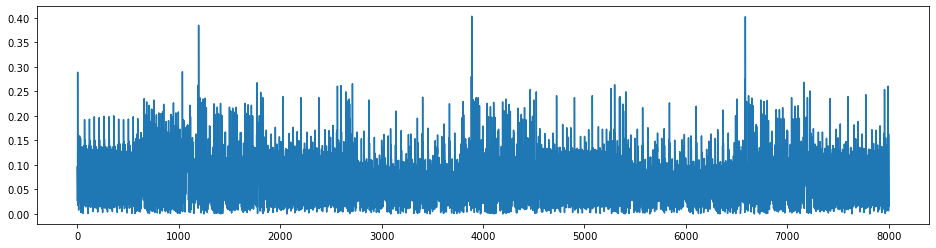

In [28]:
%matplotlib inline
plt.rcParams['figure.figsize']=(16,4)
plt.plot(trace_abs)
plt.show()

In [29]:
peaks, _ = find_peaks(trace_abs, height = 0.35)
peaks

array([1197, 3889, 6585])

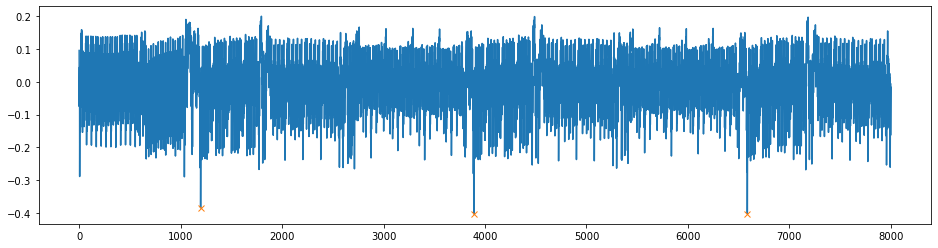

In [30]:
plt.plot(trace)
plt.plot(peaks, trace[peaks], "x")
plt.show()

In [31]:
import tqdm

In [32]:
trace_resync_list = []
for index in range(len(traces_np_array)):
    trace = traces_np_array[index]
    trace_abs = np.abs(trace)
    peaks, _ = find_peaks(trace_abs, height = 0.32)

    trace_resync_list.append(trace[peaks[0]-500: peaks[0]+3000])

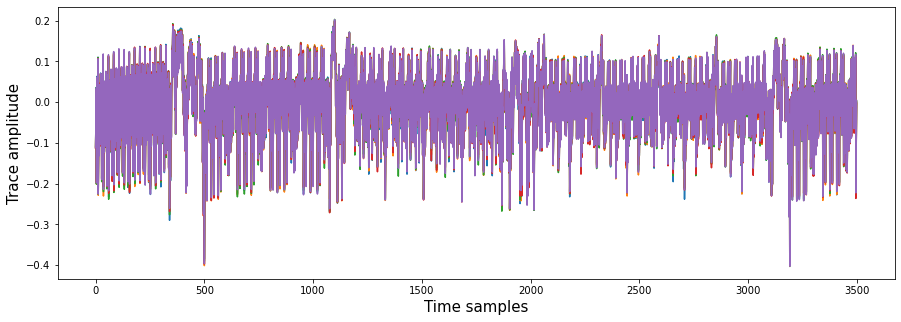

In [33]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(trace_resync_list[0])
ax.plot(trace_resync_list[1])
ax.plot(trace_resync_list[2])
ax.plot(trace_resync_list[3])
ax.plot(trace_resync_list[4])

ax.set_xlabel('Time samples', fontsize=15)
ax.set_ylabel('Trace amplitude', fontsize=15)
plt.plot()
plt.show()

In [34]:
traces_resynchronised = np.array(trace_resync_list)

<img src='images/DoIt.png' style='width: 100px'>

## Now Redo the side-channel reverse analysis

In [35]:
ths = estraces.read_ths_from_ram(samples=traces_resynchronised, **{'plaintext': plaintext_np_array, 'ciphertext': ciphertext_np_array, 'key' : key_np_array})
print(ths)

Trace Header Set:
Name.............: RAM Format THS
Reader...........: RAM reader with 100 traces. Samples shape: (100, 3500) and metadatas: ['plaintext', 'ciphertext', 'key']
plaintext........: uint8
ciphertext.......: uint8
key..............: uint8



In [36]:
container = scared.Container(ths)

In [37]:
Reverse_SB = scared.CPAReverse(selection_function = Selection_function, model = scared.HammingWeight())
Reverse_SB.run(container)

In [38]:
Reverse_SB.results.shape

(16, 3500)

### Plot results

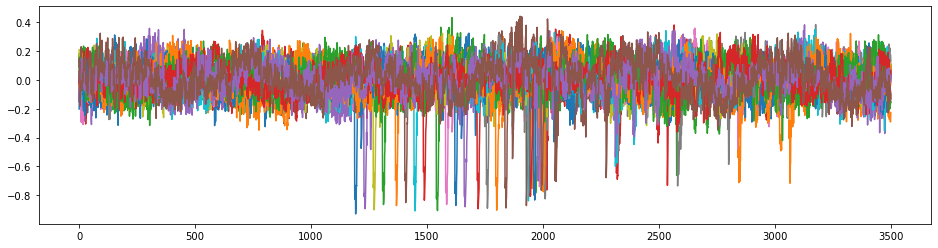

In [39]:
plt.rcParams['figure.figsize']=(16,4)
plt.plot(Reverse_SB.results.T)
plt.show()